(80, 105)

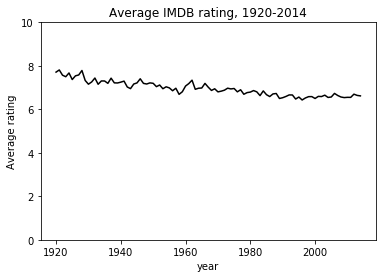

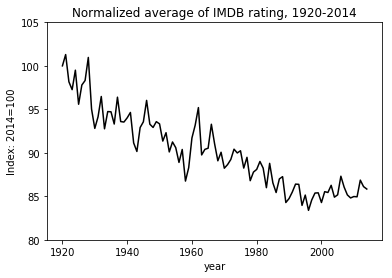

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

from data_gen import gen_df

filename = 'imdb.csv'
df = gen_df(filename)
imdb = df.copy()



imdb['avg_rat'] = imdb.groupby('year')['imdbRating'].transform(lambda x : x.mean())

imdb['avg_rat_index'] = imdb['avg_rat'].transform(lambda x : x/x[0]*100)

x=pd.DataFrame(imdb.groupby('year')['avg_rat_index'].first())
x.reset_index(inplace=True)


#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(1,2,1)

ax = imdb.groupby('year')['imdbRating'].agg(lambda x : x.mean()).plot(x='year', y = 'imdbRating', color='black')
ax.set_ylabel('Average rating')
ax.set_title(f'Average IMDB rating, 1920-2014')
ax.set_ylim([0,10])

#ax2 = fig.add_subplot(1,2,2)


ax2 = x.plot(x='year', y = 'avg_rat_index', color='black', legend=False)
ax2.set_ylabel(f'Index: 1920=100')
ax2.set_title(f'Normalized average of IMDB rating, 1920-2014')
ax2.set_ylim([80,105])


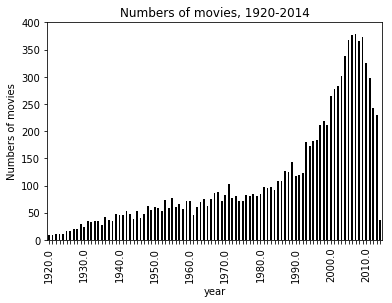

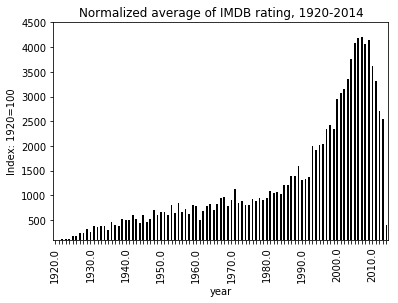

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

from data_gen import gen_df

xtics = ['1920', '1940', '1960', '1980', '2000']

filename = 'imdb.csv'
df = gen_df(filename)
imdb = df.copy()

imdb['temp']=1
imdb['tot_film'] = imdb.groupby('year')['temp'].transform(lambda x : x.sum())
del imdb['temp']

y=pd.DataFrame(imdb.groupby('year')['tot_film'].first())
y.reset_index(inplace=True)


y['tot_film_index'] = y['tot_film'].transform(lambda x : x/x[0]*100)


ax1 = y.plot(x='year', y = 'tot_film', color='black', kind='bar', legend=False)
ax1.set_ylabel('Numbers of movies')
ax1.set_title(f'Numbers of movies, 1920-2014')
ax1.set_ylim([0,400])


n = 10  # Keeps every 10th label
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_ticklabels()) if i % n != 0]




ax2 = y.plot(x='year', y = 'tot_film_index', color='black', kind='bar', legend=False)
ax2.set_ylabel(f'Index: 1920=100')
ax2.set_title(f'Normalized average of IMDB rating, 1920-2014')
ax2.set_ylim([100,4500])

n = 10  # Keeps every 10th label
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_ticklabels()) if i % n != 0];



